### The dataframe 'Leads' used in this case study makes use of the realtime lead data obtained from an online higher education Company. 

## Lead Scoring Case Study 

In [1]:
#importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing  import scale

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### Step 1: Importing and Inspecting the Data

In [2]:
#importing data frame
leadScoring_df = pd.read_csv(".\Leads.csv")
leadScoring_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#checking the shape of the dataframe
print("Shape of dataframe:", leadScoring_df.shape)

Shape of dataframe: (9240, 37)


#### We have imported the data set and we can see that the dataset has 37 columns and 9240 rows. 
#### We will now perform Exploratory data analysis by performing the below:
- View the columns and understand the data
- Checking for missing values and either removing or imputing the data
- performing univariate and bivariate analysis of the columns.

In [4]:
#checking info of dataframe
leadScoring_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

**From the dataframe we can see that there are several columns with missing values so we will need to handle these values accordngly.**

**The columns Prospect ID and Lead Number are basically primary keys assigned to each lead and will not be useful for the modelling.So we decide to remove Prospect ID and keep Lead Number for later user,such as merging.**

In [5]:
#dropping the columns Prospect ID and Lead Number
leadScoring_df.drop(["Prospect ID"], axis=1, inplace=True)
leadScoring_df.shape

#we also convert Lead number in to Object as this is a primary key
leadScoring_df["Lead Number"] = leadScoring_df["Lead Number"].astype('category')

**We also saw that a lot of the features have categorical values mentioned as 'Select'. This would mean that there was no value provided or selected for those features and these are as good as null values. Hence converting all the Select values to Null.**

In [6]:
#replacing all the SELECT values with NAN as these are as good as null values
leadScoring_df = leadScoring_df.replace('Select', np.nan)
leadScoring_df = leadScoring_df.replace('select', np.nan)

### Step 2: Data Manupulation and Preparation - Missing Value Handling, Outlier Treatment, Feature Binning

#### Next we perform missing value handling and we decide to go ahead with the below approach:
- First we remove all columns whith more than 40% missing values
- Next we remove all rows for which the columns have more than 30% missing values
- Finally we impute the remaining missing values

In [7]:
#calculating percentage of missing values
missingVal = leadScoring_df.isnull().mean() * 100
missingVal

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [8]:
#finding out the columns with more than 40% missing values
missingVal_col=[]
for i in range(len(missingVal)):
    if missingVal[i] > 40:
        missingVal_col.append(missingVal.index[i])

print(missingVal_col)

['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [9]:
leadScoring_df.drop(missingVal_col, axis=1, inplace=True)
leadScoring_df.shape

(9240, 29)

**So we have removed the below columns:**
- How did you hear about X Education', 
- Lead Quality
- Lead Profile
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score
- Asymmetrique Profile Score

**Next we will impute beffiting values to the remaining columns have missing values.**

#### But,before we do the imputation step,it'd be wise to see if the numerical columns have any outliers in them,as removal of outliers might automatically take care of some missing values in the categorical columns,in case they match with the outliers.Hence,we do the outlier detection firstly :

In [10]:
leadScoring_df.isnull().mean()

Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Fo

### Outlier Detection and elimination,by Tukey's Rule :

In [11]:
leadScoring_df_nums = leadScoring_df.select_dtypes(include=['int64','float64'])

In [12]:
leadScoring_df_nums.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0.0,0,0.0
1,0,5.0,674,2.5
2,1,2.0,1532,2.0
3,0,1.0,305,1.0
4,1,2.0,1428,1.0


In [13]:
# We drop the dependent column & include the 'Lead Number' variable to later merge the obtained matrix with the original
leadScoring_df_nums = leadScoring_df_nums.drop('Converted',axis=1)
leadScoring_df_nums['Lead Number'] = leadScoring_df['Lead Number']

In [14]:
leadScoring_df_nums.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Number
0,0.0,0,0.0,660737
1,5.0,674,2.5,660728
2,2.0,1532,2.0,660727
3,1.0,305,1.0,660719
4,2.0,1428,1.0,660681


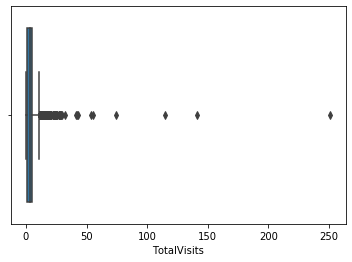

In [15]:
# Checking for the column 'TotalVisits :
sns.boxplot(leadScoring_df_nums['TotalVisits'])
plt.show()

In [16]:
# Treating 'leadScoring_df_nums['TotalVisits']' for outliers :
Q1 = leadScoring_df_nums['TotalVisits'].quantile(0.25)
Q3 = leadScoring_df_nums['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leadScoring_df_nums = leadScoring_df_nums[leadScoring_df_nums['TotalVisits'] > Q1-(1.5 * IQR)]
leadScoring_df_nums = leadScoring_df_nums[leadScoring_df_nums['TotalVisits'] < Q3+(1.5 * IQR)]

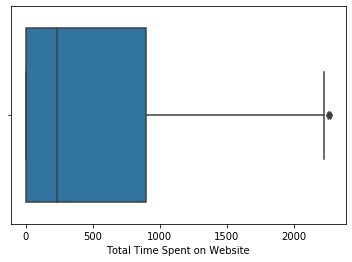

In [17]:
# Checking 'leadScoring_df_nums['Total Time Spent on Website']' for outliers :
sns.boxplot(leadScoring_df_nums['Total Time Spent on Website'])
plt.show()

In [18]:
# Treating 'leadScoring_df_nums['Total Time Spent on Website']' for outliers :
Q1 = leadScoring_df_nums['Total Time Spent on Website'].quantile(0.25)
Q3 = leadScoring_df_nums['Total Time Spent on Website'].quantile(0.75)
IQR = Q3 - Q1
leadScoring_df_nums = leadScoring_df_nums[leadScoring_df_nums['Total Time Spent on Website'] > Q1-(1.5 * IQR)]
leadScoring_df_nums = leadScoring_df_nums[leadScoring_df_nums['Total Time Spent on Website'] < Q3+(1.5 * IQR)]

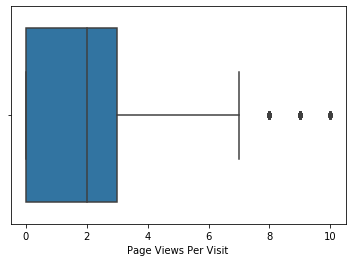

In [19]:
# Checking 'leadScoring_df_nums['Page Views Per Visit']' for outliers :
sns.boxplot(leadScoring_df_nums['Page Views Per Visit'])
plt.show()

In [20]:
# Treating 'leadScoring_df_nums['Page Views Per Visit']' for outliers :
Q1 = leadScoring_df_nums['Page Views Per Visit'].quantile(0.25)
Q3 = leadScoring_df_nums['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leadScoring_df_nums = leadScoring_df_nums[leadScoring_df_nums['Page Views Per Visit'] > Q1-(1.5 * IQR)]
leadScoring_df_nums = leadScoring_df_nums[leadScoring_df_nums['Page Views Per Visit'] < Q3+(1.5 * IQR)]

In [21]:
leadScoring_df_nums.shape

(8597, 4)

#### Now,we merge this treated matrix with the original dataframe.But for that we'll have to remove the already existing columns from the original dataframe :

In [22]:
leadScoring_df_nums.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Number
0,0.0,0,0.0,660737
1,5.0,674,2.5,660728
2,2.0,1532,2.0,660727
3,1.0,305,1.0,660719
4,2.0,1428,1.0,660681


In [23]:
leadScoring_df = leadScoring_df.drop(['TotalVisits','Total Time Spent on Website','Page Views Per Visit'],axis=1)

In [24]:
leadScoring_df = pd.merge(leadScoring_df,leadScoring_df_nums,how='inner',on ='Lead Number')

Thus,now we'll check for the missing values after this outlier treatment step :

In [25]:
leadScoring_df.isnull().mean()

Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003373
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
Last Activity                                    0.000000
Country                                          0.269396
Specialization                                   0.375480
What is your current occupation                  0.298360
What matters most to you in choosing a course    0.300454
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper                                        0.000000
Digital Advertisement                            0.000000
Through Recomm

#### Thus,clearly as expected,many of the missing values,especially in the numerical columns got treated after removal of outliers.
Now,we'll treat the missing values for the remaining columns :

In [26]:
#finding missing percentage again to get the remaining columns which have values missing
missingVal_2 = leadScoring_df.isnull().mean() * 100
missingVal_col=[]
for i in range(len(missingVal_2)):
    if missingVal_2[i] > 0 :
        missingVal_col.append(missingVal_2.index[i])

print(missingVal_col)

['Lead Source', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'City']


So we have the columns which have missing values.Cols : **'Lead Source','Country','Specialization','What is your current occupation','What matters most to you in choosing a course',Tags', 'City',''**

Let's see how the data behaves for these columns when comapred with Converted column.

Let's first consider the column "City" and see how the data behaves :

In [27]:
#for City
leadScoring_df["City"].value_counts()

Mumbai                         2932
Thane & Outskirts               685
Other Cities                    627
Other Cities of Maharashtra     417
Other Metro Cities              347
Tier II Cities                   67
Name: City, dtype: int64

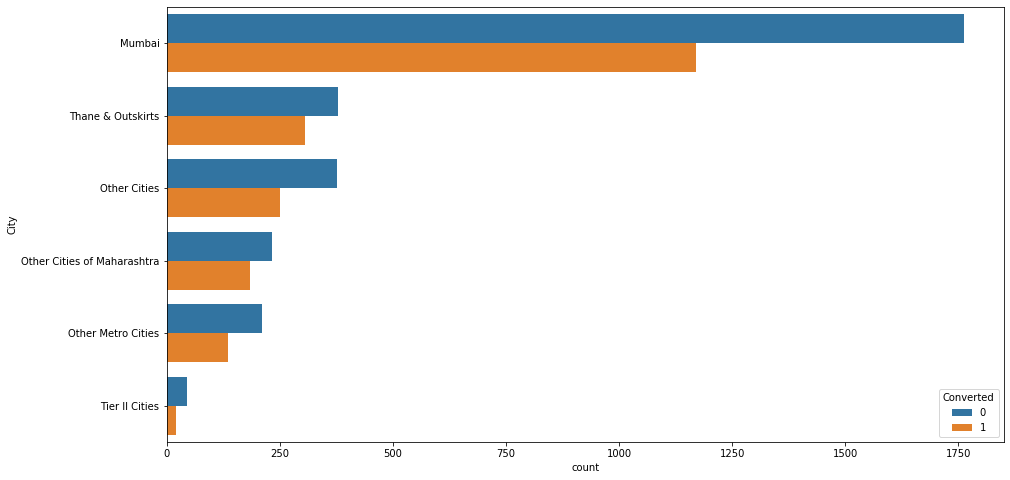

In [28]:
#plot between City and Converted to visualise the data distribution
plt.figure(figsize=(15, 8))
ax = sns.countplot(y="City", hue="Converted", data=leadScoring_df)
plt.show()

Looking at the unique data and its variance with the target variable converted, it would seem better to remove the column City than removing the missing values.
Hence removing the column City.

In [29]:
#dropping the col City
leadScoring_df.drop("City", axis=1, inplace= True)
leadScoring_df.shape

(8597, 28)

Also,on a similar note,we'll also check the 'Country' column :

In [30]:
#for Country
leadScoring_df["Country"].value_counts()

India                   6010
United States             65
United Arab Emirates      50
Singapore                 23
Saudi Arabia              20
United Kingdom            13
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     5
Germany                    4
Canada                     4
Nigeria                    4
Kuwait                     4
unknown                    4
South Africa               3
Asia/Pacific Region        2
Philippines                2
Uganda                     2
Ghana                      2
Bangladesh                 2
Italy                      2
Sweden                     2
Belgium                    2
China                      2
Kenya                      1
Vietnam                    1
Denmark                    1
Russia                     1
Liberia                    1
Switzerland                1
Tanzania                   1
Malaysia      

#### Now,because of unusually high number of values for the country 'India' for the column 'Country',it doesn't introduce much variance to the data,and hence we'll also drop this feature.

In [31]:
#dropping the col Country
leadScoring_df.drop("Country", axis=1, inplace= True)
leadScoring_df.shape

(8597, 27)

In [32]:
#next we check for the column Specialisation :
leadScoring_df["Specialization"].value_counts()

Finance Management                   905
Marketing Management                 783
Human Resource Management            776
Operations Management                477
Business Administration              371
IT Projects Management               345
Supply Chain Management              314
Banking, Investment And Insurance    297
Media and Advertising                181
Travel and Tourism                   173
International Business               167
Healthcare Management                139
Hospitality Management               102
E-COMMERCE                            99
Retail Management                     90
Rural and Agribusiness                63
E-Business                            52
Services Excellence                   35
Name: Specialization, dtype: int64

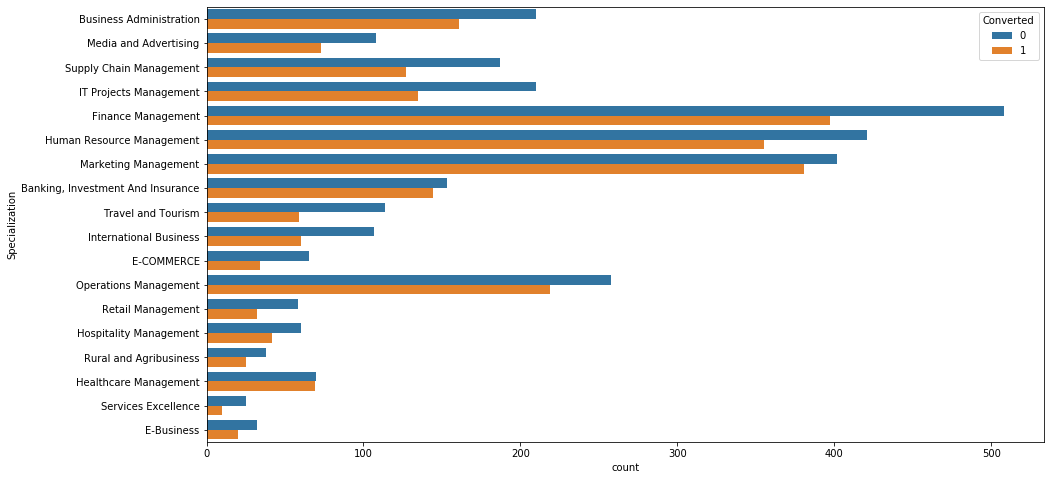

In [33]:
#Visualising the data
plt.figure(figsize=(15, 8))
ax = sns.countplot(y="Specialization", hue="Converted", data=leadScoring_df)
plt.show()

#### We'll also check the distribution of it's values with the dependent variable,'Converted' :

In [34]:
leadScoring_df.groupby('Specialization')['Converted'].value_counts()

Specialization                     Converted
Banking, Investment And Insurance  0            153
                                   1            144
Business Administration            0            210
                                   1            161
E-Business                         0             32
                                   1             20
E-COMMERCE                         0             65
                                   1             34
Finance Management                 0            508
                                   1            397
Healthcare Management              0             70
                                   1             69
Hospitality Management             0             60
                                   1             42
Human Resource Management          0            421
                                   1            355
IT Projects Management             0            210
                                   1            135
International Busin

In [35]:
# Calculating the Conversion rates for the various categories in the 'Specialization' column :
leadScoring_df.groupby('Specialization')['Converted'].mean()

Specialization
Banking, Investment And Insurance    0.484848
Business Administration              0.433962
E-Business                           0.384615
E-COMMERCE                           0.343434
Finance Management                   0.438674
Healthcare Management                0.496403
Hospitality Management               0.411765
Human Resource Management            0.457474
IT Projects Management               0.391304
International Business               0.359281
Marketing Management                 0.486590
Media and Advertising                0.403315
Operations Management                0.459119
Retail Management                    0.355556
Rural and Agribusiness               0.396825
Services Excellence                  0.285714
Supply Chain Management              0.404459
Travel and Tourism                   0.341040
Name: Converted, dtype: float64

#### Thus,on calculating the percentages of 'Conveted',or the conversion rate for each of these categories,we can note the following observations :
- Certain categories have very much resemblance amongst their conversion rates.
- In terms of business aspect,it seems correct to group certain categories together in the same column.
** Thus,based on a tradeoff between the 2 aspects mentioned above,we group the categories into certain groups as mentioned below :

- '__Banking,Investment & Healthcare Insurance__' : 'Healthcare Management','Banking, Investment And Insurance'.
- '__Operations & Human Resources__' : 'Human Resource Management','Operations Management'.
- '__Business & Finance Management__' : 'IT Projects Management', 'Finance Management','Business Administration','Hospitality       Management','International Business'.
- '__Marketing Management__' : 'Media and Advertising','Marketing Management'.
- '__Retail & Supply Chain__' : 'E-Business','Retail Management','E-COMMERCE','Rural and Agribusiness','Supply Chain Management'.
- '__Others__' : 'Services Excellence','Travel and Tourism' .

In [36]:
leadScoring_df['Specialization'].replace({'Healthcare Management':'Banking,Investment & Healthcare Insurance','Human Resource Management':'Operations & Human Resources','IT Projects Management':'Business & Finance Management','Finance Management':'Business & Finance Management','Banking, Investment And Insurance':'Banking,Investment & Healthcare Insurance','Media and Advertising':'Marketing Management','Services Excellence':'Others','Operations Management':'Operations & Human Resources','Business Administration':'Business & Finance Management','E-Business':'Retail & Supply Chain','E-COMMERCE':'Retail & Supply Chain','Rural and Agribusiness':'Retail & Supply Chain','Supply Chain Management':'Retail & Supply Chain','Hospitality Management':'Business & Finance Management','International Business':'Business & Finance Management'},inplace=True)

In [37]:
leadScoring_df.groupby('Specialization')['Converted'].mean()

Specialization
Banking,Investment & Healthcare Insurance    0.488532
Business & Finance Management                0.420635
Marketing Management                         0.470954
Operations & Human Resources                 0.458101
Others                                       0.285714
Retail & Supply Chain                        0.390152
Retail Management                            0.355556
Travel and Tourism                           0.341040
Name: Converted, dtype: float64

In [38]:
leadScoring_df['Specialization'].replace({'Travel and Tourism':'Others','Retail Management':'Retail & Supply Chain'},inplace=True)

In [39]:
leadScoring_df.groupby('Specialization')['Converted'].mean()

Specialization
Banking,Investment & Healthcare Insurance    0.488532
Business & Finance Management                0.420635
Marketing Management                         0.470954
Operations & Human Resources                 0.458101
Others                                       0.331731
Retail & Supply Chain                        0.385113
Name: Converted, dtype: float64

#### Now,for filling the missing values,we check the conversion rate for the rows with missing values,as follows:

In [40]:
leadScoring_df[leadScoring_df['Specialization'].isnull()]['Converted'].mean()

0.27633209417596033

#### Thus,based on above analysis,the category or group to which the missing values most closely resemble in terms of the conversion rate, is the category 'Others'. Thus,since this is the category where most of the clients didn't convert,we'll assign the same to the missing values :

In [41]:
leadScoring_df['Specialization'].fillna('Others',inplace = True)

In [42]:
leadScoring_df['Specialization'].isnull().sum()

0

#### Coming to the next feature 'Lead Source' :

In [43]:
# Checking value_counts()
leadScoring_df['Lead Source'].value_counts()

Google               2741
Direct Traffic       2389
Olark Chat           1742
Organic Search        966
Reference             441
Welingak Website      128
Referral Sites        105
Facebook               30
bing                    6
google                  5
Click2call              3
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
Press_Release           1
testone                 1
welearnblog_Home        1
NC_EDM                  1
youtubechannel          1
blog                    1
Name: Lead Source, dtype: int64

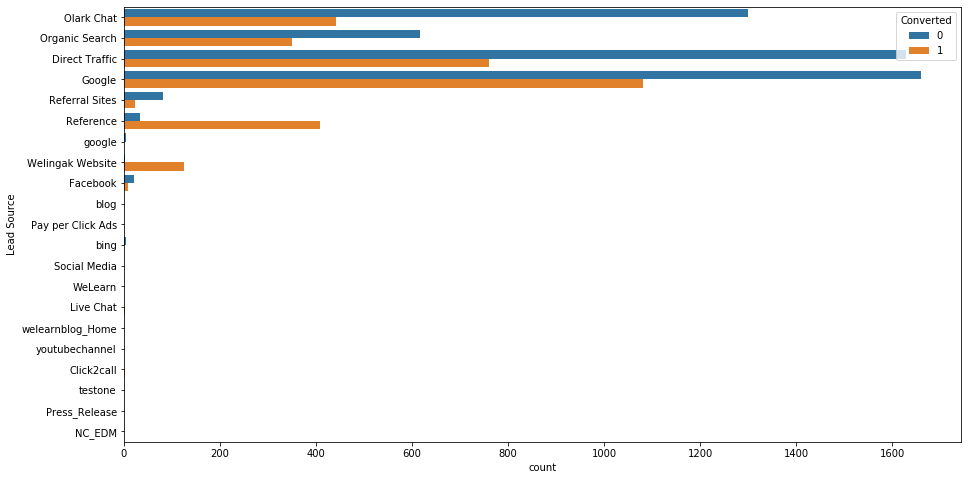

In [44]:
#Visualising the data
plt.figure(figsize=(15, 8))
ax = sns.countplot(y="Lead Source", hue="Converted", data=leadScoring_df)
plt.show()

#### Thus ,based on what we analyse from above :
- Google has the highest number of occurences amongst all categories,which is obvious.
- There are many categories which can be grouped together under the major categories to reduce the number of total categories.These major categories are :
- __Google__
- __Direct Traffic__
- __Live Chat__
- __Reference__
- __Referral Sites__

In [45]:
leadScoring_df['Lead Source'] = leadScoring_df['Lead Source'].replace(['google','Olark Chat','Facebook','Organic Search','Welingak Website','Social Media'],['Google','Live Chat','Referral Sites','Google','Referral Sites','Referral Sites'])

#### So,as obviously most of the searches are directly or indirectly via 'Google',we can easily replaced all missing and anomalous values with 'Google' as follows :

In [46]:
for i in leadScoring_df['Lead Source']:
    if i in ['Google','Direct Traffic','Live Chat','Reference','Referral Sites']:
        pass
    else:
        leadScoring_df['Lead Source'].replace({i:'Google'},inplace=True)

In [47]:
leadScoring_df['Lead Source'].value_counts()

Google            3758
Direct Traffic    2389
Live Chat         1744
Reference          441
Referral Sites     265
Name: Lead Source, dtype: int64

In [48]:
leadScoring_df['Lead Source'].isnull().sum()

0

#### Remaining variables to be imputed are ''What is your current occupation', 'What matters most to you in choosing a course', 'Tags' :

In [49]:
leadScoring_df['What is your current occupation'].value_counts()

Unemployed              5169
Working Professional     637
Student                  199
Other                     12
Housewife                  9
Businessman                6
Name: What is your current occupation, dtype: int64

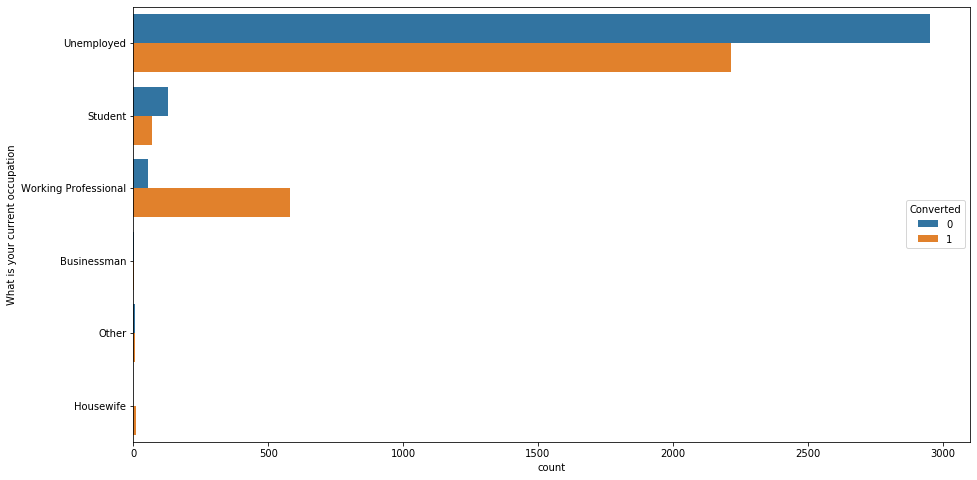

In [50]:
#Visualising the data
plt.figure(figsize=(15, 8))
ax = sns.countplot(y="What is your current occupation", hue="Converted", data=leadScoring_df)
plt.show()

In [51]:
leadScoring_df['What is your current occupation'].replace({'Businessman':'Working Professional','Housewife':'Other'},inplace=True)

In [52]:
leadScoring_df['What is your current occupation'].value_counts()

Unemployed              5169
Working Professional     643
Student                  199
Other                     21
Name: What is your current occupation, dtype: int64

In [53]:
leadScoring_df.groupby('What is your current occupation')['Converted'].mean()

What is your current occupation
Other                   0.714286
Student                 0.346734
Unemployed              0.428323
Working Professional    0.911353
Name: Converted, dtype: float64

In [54]:
leadScoring_df[leadScoring_df['What is your current occupation'].isnull()]['Converted'].mean()

0.1368421052631579

In [55]:
len(leadScoring_df[leadScoring_df['What is your current occupation'].isnull()])

2565

#### Since,only 13% of the missing values in 'What is your current occupation' column converted,we can see that :
- Firstly,it doesn't match the conversion rates of any of the pre-existing categories.
- Secondly,the number of values missing is also very high as compared to the remaining categories.
__ Thus,the best thing for us to do would be to create a separate category 'Unknown' which would suffice for this.__

In [56]:
leadScoring_df['What is your current occupation'].fillna('Unknown',inplace=True)

In [57]:
leadScoring_df['What is your current occupation'].value_counts()

Unemployed              5169
Unknown                 2565
Working Professional     643
Student                  199
Other                     21
Name: What is your current occupation, dtype: int64

In [58]:
# For column 'What matters most to you in choosing a course' :
leadScoring_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6012
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### It doesn't have the necessary variance.So,we'll drop this column :

In [59]:
leadScoring_df = leadScoring_df.drop('What matters most to you in choosing a course',axis=1)

In [60]:
# For column 'Tags' :
# For column 'What matters most to you in choosing a course' :
leadScoring_df['Tags'].value_counts()

Will revert after reading the email                  1909
Ringing                                              1112
Interested in other courses                           484
Already a student                                     451
Closed by Horizzon                                    269
switched off                                          228
Busy                                                  172
Lost to EINS                                          163
Not doing further education                           135
Interested  in full time MBA                          108
Graduation in progress                                103
invalid number                                         72
Diploma holder (Not Eligible)                          62
wrong number given                                     41
opp hangup                                             31
number not provided                                    25
in touch with EINS                                     12
Lost to Others

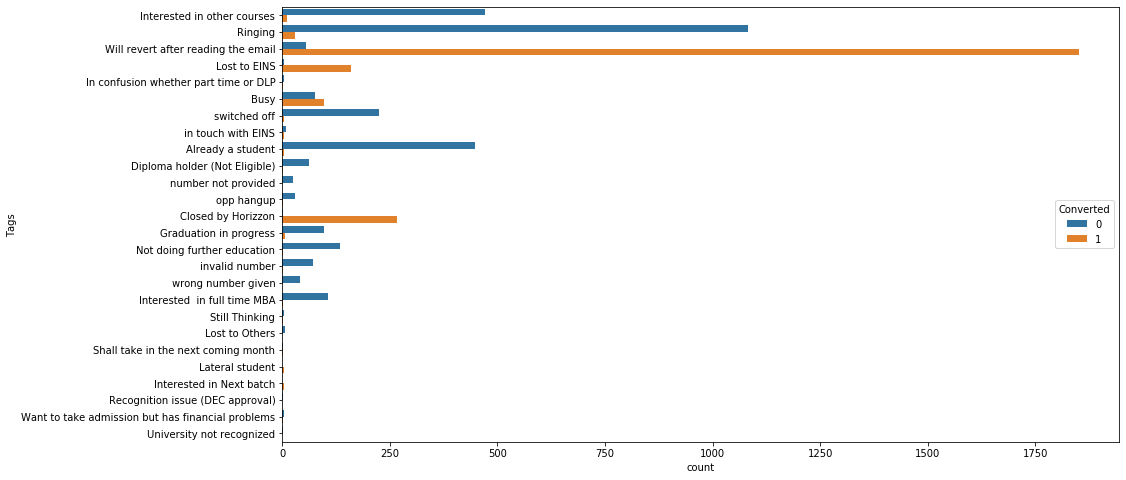

In [61]:
#Visualising the data
plt.figure(figsize=(15, 8))
ax = sns.countplot(y="Tags", hue="Converted", data=leadScoring_df)
plt.show()

In [62]:
leadScoring_df.groupby(['Tags'])['Converted'].value_counts()

Tags                                               Converted
Already a student                                  0             448
                                                   1               3
Busy                                               1              97
                                                   0              75
Closed by Horizzon                                 1             267
                                                   0               2
Diploma holder (Not Eligible)                      0              61
                                                   1               1
Graduation in progress                             0              97
                                                   1               6
In confusion whether part time or DLP              0               4
                                                   1               1
Interested  in full time MBA                       0             106
                                          

#### Hence based on the above analysis of comparing every tag with the dependent variable,I come across these 4 cases majorly :
- Most likely to take the course
- Unlikely 
- Confused
- Invalid
#### Hence,I create the befitting clusters to group each of these variables :

In [63]:
leadScoring_df['Tags'].replace({'Will revert after reading the email':'Most likely','Ringing':'Most Unlikely','Interested in other courses':'Most Unlikely','Already a student':'Most Unlikely','Closed by Horizzon':'Most Likely','switched off':'Most Unlikely','Busy':'Likely','Lost to EINS':'Most Likely','Not doing further education':'Invalid','Interested  in full time MBA':'Most Unlikely','Graduation in progress':'Most Unlikely','invalid number':'Invalid','Diploma holder (Not Eligible)':'Invalid','wrong number given':'Invalid','opp hangup':'Most Unlikely','number not provided':'Invalid','in touch with EINS':'Confused','Lost to Others':'Invalid','Still Thinking':'Confused','In confusion whether part time or DLP':'Confused','Want to take admission but has financial problems':'Confused','Lateral Student':'Most Likely','Interested in Next batch':'Most Likely','Shall take in the next coming month':'Confused','University not recognized':'Invalid','Recognition issue':'Invalid'},inplace=True)

In [64]:
leadScoring_df['Tags'].value_counts()

Most Unlikely                       2517
Most likely                         1909
Most Likely                          437
Invalid                              344
Likely                               172
Confused                              30
Lateral student                        3
Recognition issue (DEC approval)       1
Name: Tags, dtype: int64

In [65]:
leadScoring_df['Tags'] = leadScoring_df['Tags'].replace({'Most likely':'Most Likely','Lateral student':'Most Likely','Recognition issue (DEC approval)':'Invalid'})

In [66]:
leadScoring_df.groupby(['Tags'])['Converted'].mean()

Tags
Confused         0.233333
Invalid          0.008696
Likely           0.563953
Most Likely      0.973606
Most Unlikely    0.023043
Name: Converted, dtype: float64

In [67]:
leadScoring_df['Tags'].value_counts()

Most Unlikely    2517
Most Likely      2349
Invalid           345
Likely            172
Confused           30
Name: Tags, dtype: int64

In [68]:
len(leadScoring_df[leadScoring_df['Tags'].isnull()])

3184

In [69]:
leadScoring_df[leadScoring_df['Tags'].isnull()]['Converted'].mean()

0.24591708542713567

#### Hence,based on the conversion rates above,it'd be suitable to group these missing values under the category 'Confused',as although the missing values are very high,but it makes logical sense that they are confused,and hence only 25% of them finally converted.

In [70]:
leadScoring_df['Tags'].fillna('Confused',inplace=True)
leadScoring_df['Tags'].value_counts()

Confused         3214
Most Unlikely    2517
Most Likely      2349
Invalid           345
Likely            172
Name: Tags, dtype: int64

#### Thus,based on the conversion rates as well,it makes clear sense to group these variables,as they have been.

In [71]:
leadScoring_df.isnull().sum()

Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                                        0
Update me on Supply Chain Content           0
Get updates on DM Content                   0
I agree to pay the amount through cheque    0
A free copy of Mastering The Inter

### Thus,we can clearly see that there are no more rows with missing values in the dataframe.

#### So,the next target now is to deal with all the remaining columns with categorical values :

In [72]:
# Firstly,I group all the remaining categorical variables together in one dataframe 'leads_cats'.
leadScoring_df_cats = leadScoring_df.select_dtypes(include = ['object'])

In [73]:
leadScoring_df_cats.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Now,I'll analyse all the remaining categorical columns,one by one :

In [74]:
leadScoring_df['Lead Origin'].value_counts()

Landing Page Submission    4502
API                        3461
Lead Add Form               604
Lead Import                  30
Name: Lead Origin, dtype: int64

#### Having only 4 categories,we'll leave it as it is.

In [75]:
leadScoring_df['Do Not Email'].value_counts()

No     7927
Yes     670
Name: Do Not Email, dtype: int64

#### It has only 2 categories,and has a significant distribution.So,we'll leaved it untouched.

In [76]:
leadScoring_df['Do Not Call'].value_counts()

No     8595
Yes       2
Name: Do Not Call, dtype: int64

In [77]:
# Dropping 'Do Not Call',since no variance.
leadScoring_df = leadScoring_df.drop('Do Not Call',axis=1)

In [78]:
leadScoring_df['Last Activity'].value_counts()

Email Opened                    3250
SMS Sent                        2598
Olark Chat Conversation          948
Page Visited on Website          522
Converted to Lead                425
Email Bounced                    306
Email Link Clicked               257
Form Submitted on Website        111
Unreachable                       84
Unsubscribed                      60
Had a Phone Conversation          21
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### Let's treat 'Last Activity' now :

In [79]:
leadScoring_df.groupby(['Last Activity'])['Converted'].value_counts()

Last Activity                 Converted
Approached upfront            1               5
Converted to Lead             0             372
                              1              53
Email Bounced                 0             290
                              1              16
Email Link Clicked            0             186
                              1              71
Email Marked Spam             1               2
Email Opened                  0            2083
                              1            1167
Email Received                1               2
Form Submitted on Website     0              85
                              1              26
Had a Phone Conversation      1              17
                              0               4
Olark Chat Conversation       0             873
                              1              75
Page Visited on Website       0             400
                              1             122
Resubscribed to emails        1               1


In [80]:
leadScoring_df.groupby(['Last Activity'])['Converted'].mean()

Last Activity
Approached upfront              1.000000
Converted to Lead               0.124706
Email Bounced                   0.052288
Email Link Clicked              0.276265
Email Marked Spam               1.000000
Email Opened                    0.359077
Email Received                  1.000000
Form Submitted on Website       0.234234
Had a Phone Conversation        0.809524
Olark Chat Conversation         0.079114
Page Visited on Website         0.233716
Resubscribed to emails          1.000000
SMS Sent                        0.629330
Unreachable                     0.333333
Unsubscribed                    0.250000
View in browser link Clicked    0.000000
Visited Booth in Tradeshow      0.000000
Name: Converted, dtype: float64

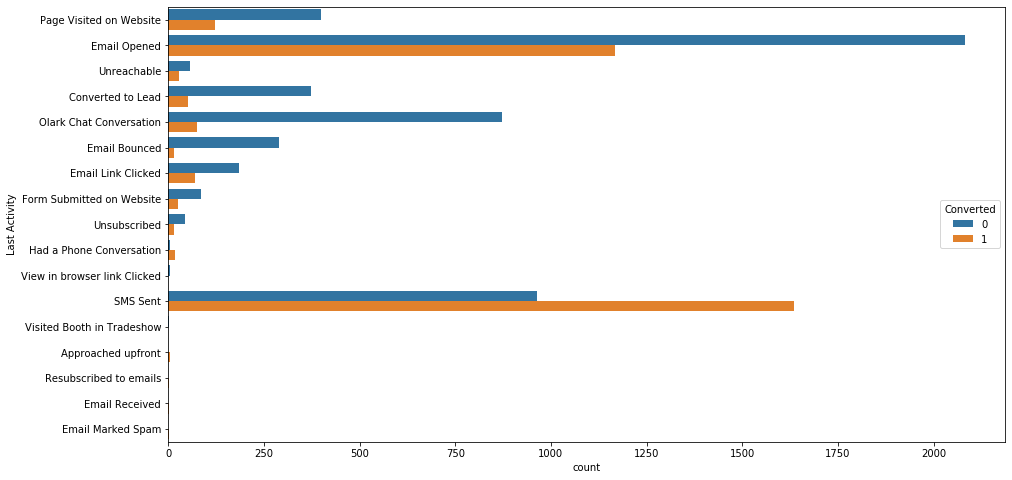

In [81]:
#Visualising the data
plt.figure(figsize=(15, 8))
ax = sns.countplot(y="Last Activity", hue="Converted", data=leadScoring_df)
plt.show()

#### Hence,based on above analysis of column 'Last Activity',we can find three different stages of the lead funnelling process,from the last activity the client performed :
- __Funnel Top__ : These are the initial activities everyone will go through before enrolling into the course.For e.g.Visiting the website,visiting booth in tradeshow,Olark Chat etc.
- __Funnel Middle__ : These are the activities the client will undertake once he passes the initial stages,upto Form submission on the website,and shows some interest.
- __Funnel Bottom__ : These are the final stages of Lead Conversion process,where a client will have telephonic conversations,approach upfront,etc before he finally joins the course,or doesn't.

In [82]:
leadScoring_df['Last Activity'] = leadScoring_df['Last Activity'].replace({'Email Opened':'Funnel Middle','SMS Sent':'Funnel Bottom','Olark Chat Conversation':'Funnel Top','Page Visited on Website':'Funnel Top','Converted to Lead':'Funnel Middle','Email Bounced':'Funnel Top','Email Link Clicked':'Funnel Middle','Form Submitted on Website':'Funnel Top','Unreachable':'Funnel Bottom','Unsubscribed':'Funnel Middle','Had a Phone Conversation':'Funnel Bottom','Approached upfront':'Funnel Bottom','View in browser link Clicked':'Funnel Top','Email Marked Spam':'Funnel Bottom','Email Received':'Funnel Middle','Resubscribed to emails':'Funnel Bottom','Visited Booth in Tradeshow':'Funnel Top'})

In [83]:
leadScoring_df.groupby(['Last Activity'])['Converted'].value_counts()

Last Activity  Converted
Funnel Bottom  1            1688
               0            1023
Funnel Middle  0            2686
               1            1308
Funnel Top     0            1653
               1             239
Name: Converted, dtype: int64

#### Moving on to the next column :

In [84]:
leadScoring_df['Search'].value_counts()

No     8591
Yes       6
Name: Search, dtype: int64

#### Because of minimal variance,we drop this column.

In [85]:
leadScoring_df = leadScoring_df.drop('Search',axis=1)

In [86]:
leadScoring_df['Magazine'].value_counts()

No    8597
Name: Magazine, dtype: int64

In [87]:
# Dropping because of minimal variance .
leadScoring_df = leadScoring_df.drop('Magazine',axis=1)

Thus,from the analysis above,now we'll drop all the columns with minimal variance,in one go :

In [88]:
leadScoring_df.select_dtypes(include=['object']).columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [89]:
print(leadScoring_df['Newspaper Article'].value_counts())
print(leadScoring_df['X Education Forums'].value_counts())
print(leadScoring_df['Newspaper'].value_counts())
print(leadScoring_df['Digital Advertisement'].value_counts())
print(leadScoring_df['Through Recommendations'].value_counts())
print(leadScoring_df['Receive More Updates About Our Courses'].value_counts())
print(leadScoring_df['Update me on Supply Chain Content'].value_counts())
print(leadScoring_df['Get updates on DM Content'].value_counts())
print(leadScoring_df['I agree to pay the amount through cheque'].value_counts())
print(leadScoring_df['A free copy of Mastering The Interview'].value_counts())
print(leadScoring_df['Last Notable Activity'].value_counts())

No    8597
Name: Newspaper Article, dtype: int64
No    8597
Name: X Education Forums, dtype: int64
No     8596
Yes       1
Name: Newspaper, dtype: int64
No     8595
Yes       2
Name: Digital Advertisement, dtype: int64
No     8594
Yes       3
Name: Through Recommendations, dtype: int64
No    8597
Name: Receive More Updates About Our Courses, dtype: int64
No    8597
Name: Update me on Supply Chain Content, dtype: int64
No    8597
Name: Get updates on DM Content, dtype: int64
No    8597
Name: I agree to pay the amount through cheque, dtype: int64
No     5998
Yes    2599
Name: A free copy of Mastering The Interview, dtype: int64
Modified                        3139
Email Opened                    2667
SMS Sent                        2060
Page Visited on Website          241
Olark Chat Conversation          174
Email Link Clicked               163
Email Bounced                     59
Unsubscribed                      46
Unreachable                       30
Had a Phone Conversation         

In [90]:
# Hence we drop the minimal variance columns :
leadScoring_df = leadScoring_df.drop(['Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],axis=1)

In [91]:
# Treating the final column 'Last Notable Activity' :
leadScoring_df.groupby(['Last Notable Activity'])['Converted'].value_counts()

Last Notable Activity         Converted
Approached upfront            1               1
Email Bounced                 0              50
                              1               9
Email Link Clicked            0             120
                              1              43
Email Marked Spam             1               2
Email Opened                  0            1697
                              1             970
Email Received                1               1
Form Submitted on Website     0               1
Had a Phone Conversation      1              10
                              0               1
Modified                      0            2494
                              1             645
Olark Chat Conversation       0             153
                              1              21
Page Visited on Website       0             170
                              1              71
Resubscribed to emails        1               1
SMS Sent                      1            1427


In [92]:
leadScoring_df.groupby(['Last Notable Activity'])['Converted'].mean()

Last Notable Activity
Approached upfront              1.000000
Email Bounced                   0.152542
Email Link Clicked              0.263804
Email Marked Spam               1.000000
Email Opened                    0.363705
Email Received                  1.000000
Form Submitted on Website       0.000000
Had a Phone Conversation        0.909091
Modified                        0.205479
Olark Chat Conversation         0.120690
Page Visited on Website         0.294606
Resubscribed to emails          1.000000
SMS Sent                        0.692718
Unreachable                     0.700000
Unsubscribed                    0.282609
View in browser link Clicked    0.000000
Name: Converted, dtype: float64

Thus,comparing the 'Last Notable Activity' column with 'Last Activity' column above,we note that the values are same or in the same range for most categories,except a few categories missing,and presence of category 'Modified'. Hence,we redo the same clustering or binning we did __based on funneling of the customer,except for the 'Modified' category,in 'Funnel Middle',as follows : __

In [93]:
leadScoring_df['Last Notable Activity'] = leadScoring_df['Last Notable Activity'].replace({'Approached upfront':'Funnel Bottom','Email Bounced':'Funnel Top','Email Link Clicked':'Funnel Middle','Email Marked Spam':'Funnel Bottom','Email Opened':'Funnel Middle','Email Received':'Funnel Middle','Form Submitted on Website':'Funnel Top','Had a Phone Conversation':'Funnel Bottom','Modified':'Funnel Middle','Olark Chat Conversation':'Funnel Top','Page Visited on Website':'Funnel Top','Resubscribed to emails':'Funnel Bottom','SMS Sent':'Funnel Bottom','Unreachable':'Funnel Bottom','Unsubscribed':'Funnel Middle','View in browser link Clicked':'Funnel Top'})

In [94]:
leadScoring_df.shape

(8597, 14)

Finally we are now left with **8597 rows and 14 columns**.

In [95]:
leadScoring_cleaned_df = leadScoring_df.copy()
leadScoring_cleaned_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,660737,API,Live Chat,No,0,Funnel Top,Others,Unemployed,Most Unlikely,No,Funnel Middle,0.0,0,0.0
1,660728,API,Google,No,0,Funnel Middle,Others,Unemployed,Most Unlikely,No,Funnel Middle,5.0,674,2.5
2,660727,Landing Page Submission,Direct Traffic,No,1,Funnel Middle,Business & Finance Management,Student,Most Likely,Yes,Funnel Middle,2.0,1532,2.0
3,660719,Landing Page Submission,Direct Traffic,No,0,Funnel Bottom,Marketing Management,Unemployed,Most Unlikely,No,Funnel Middle,1.0,305,1.0
4,660681,Landing Page Submission,Google,No,1,Funnel Middle,Others,Unemployed,Most Likely,No,Funnel Middle,2.0,1428,1.0


### Step 3: Conversion of Categorical Variables( Creating dummies) :

In [96]:
leadScoring_cleaned_df_cats = list(leadScoring_cleaned_df.select_dtypes(include = ['object']).columns)

In [97]:
leadScoring_cleaned_df_cats

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [98]:
# Getting dummies for all the categorical columns,with avoiding the dummy variable trap:
leadScoring_cleaned_df = pd.get_dummies(leadScoring_cleaned_df,columns=leadScoring_cleaned_df_cats,drop_first=True)

In [99]:
leadScoring_cleaned_df.shape

(8597, 31)

In [100]:
leadScoring_cleaned_df['Converted'].value_counts()

0    5362
1    3235
Name: Converted, dtype: int64

In [101]:
leadScoring_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8597 entries, 0 to 8596
Data columns (total 31 columns):
Lead Number                                             8597 non-null category
Converted                                               8597 non-null int64
TotalVisits                                             8597 non-null float64
Total Time Spent on Website                             8597 non-null int64
Page Views Per Visit                                    8597 non-null float64
Lead Origin_Landing Page Submission                     8597 non-null uint8
Lead Origin_Lead Add Form                               8597 non-null uint8
Lead Origin_Lead Import                                 8597 non-null uint8
Lead Source_Google                                      8597 non-null uint8
Lead Source_Live Chat                                   8597 non-null uint8
Lead Source_Reference                                   8597 non-null uint8
Lead Source_Referral Sites                        

In [102]:
pd.set_option('display.max_columns',32)
leadScoring_cleaned_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Reference,Lead Source_Referral Sites,Do Not Email_Yes,Last Activity_Funnel Middle,Last Activity_Funnel Top,Specialization_Business & Finance Management,Specialization_Marketing Management,Specialization_Operations & Human Resources,Specialization_Others,Specialization_Retail & Supply Chain,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Tags_Invalid,Tags_Likely,Tags_Most Likely,Tags_Most Unlikely,A free copy of Mastering The Interview_Yes,Last Notable Activity_Funnel Middle,Last Notable Activity_Funnel Top
0,660737,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
1,660728,0,5.0,674,2.5,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
4,660681,1,2.0,1428,1.0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0


### Step 4: Train-Test Split

#### So,before the train and test split we'll divide the data into X (independent variable matrix) and y (dependent variable matrix)

In [103]:
# Putting feature variable to X
X = leadScoring_cleaned_df.drop(['Converted'], axis=1)

X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Reference,Lead Source_Referral Sites,Do Not Email_Yes,Last Activity_Funnel Middle,Last Activity_Funnel Top,Specialization_Business & Finance Management,Specialization_Marketing Management,Specialization_Operations & Human Resources,Specialization_Others,Specialization_Retail & Supply Chain,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Tags_Invalid,Tags_Likely,Tags_Most Likely,Tags_Most Unlikely,A free copy of Mastering The Interview_Yes,Last Notable Activity_Funnel Middle,Last Notable Activity_Funnel Top
0,660737,0.0,0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
1,660728,5.0,674,2.5,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
2,660727,2.0,1532,2.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0
3,660719,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
4,660681,2.0,1428,1.0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0


In [104]:
# Putting response variable to y
y = leadScoring_cleaned_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state=100)

In [106]:
X_train_cat = X_train.copy()
X_train = X_train.drop('Lead Number',axis=1)

In [107]:
X_test_cat = X_test.copy()
X_test = X_test.drop('Lead Number',axis=1)

### Step 5: Feature Scaling

In [108]:
#importing the libraries
from sklearn.preprocessing import MinMaxScaler

In [109]:
# Fitting & transforming the train data :
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Reference,Lead Source_Referral Sites,Do Not Email_Yes,Last Activity_Funnel Middle,Last Activity_Funnel Top,Specialization_Business & Finance Management,Specialization_Marketing Management,Specialization_Operations & Human Resources,Specialization_Others,Specialization_Retail & Supply Chain,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Tags_Invalid,Tags_Likely,Tags_Most Likely,Tags_Most Unlikely,A free copy of Mastering The Interview_Yes,Last Notable Activity_Funnel Middle,Last Notable Activity_Funnel Top
7828,0.6,0.117700,0.428571,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
1541,0.3,0.016622,0.428571,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
6070,0.0,0.000000,0.000000,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1360,0.4,0.143756,0.571429,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
7337,0.2,0.498652,0.285714,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0


In [110]:
#transforming the test data :

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Reference,Lead Source_Referral Sites,Do Not Email_Yes,Last Activity_Funnel Middle,Last Activity_Funnel Top,Specialization_Business & Finance Management,Specialization_Marketing Management,Specialization_Operations & Human Resources,Specialization_Others,Specialization_Retail & Supply Chain,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Tags_Invalid,Tags_Likely,Tags_Most Likely,Tags_Most Unlikely,A free copy of Mastering The Interview_Yes,Last Notable Activity_Funnel Middle,Last Notable Activity_Funnel Top
4088,0.0,0.000000,0.000000,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1080,0.2,0.084007,0.285714,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0
1946,0.0,0.000000,0.000000,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
4462,0.0,0.000000,0.000000,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
2577,0.4,0.109614,0.571429,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [111]:
#Checking the conversion rate
y.mean()

0.3762940560660696

So in the data we have almost 37.63% of conversion data.

### Step 6: Checking the data Correlations

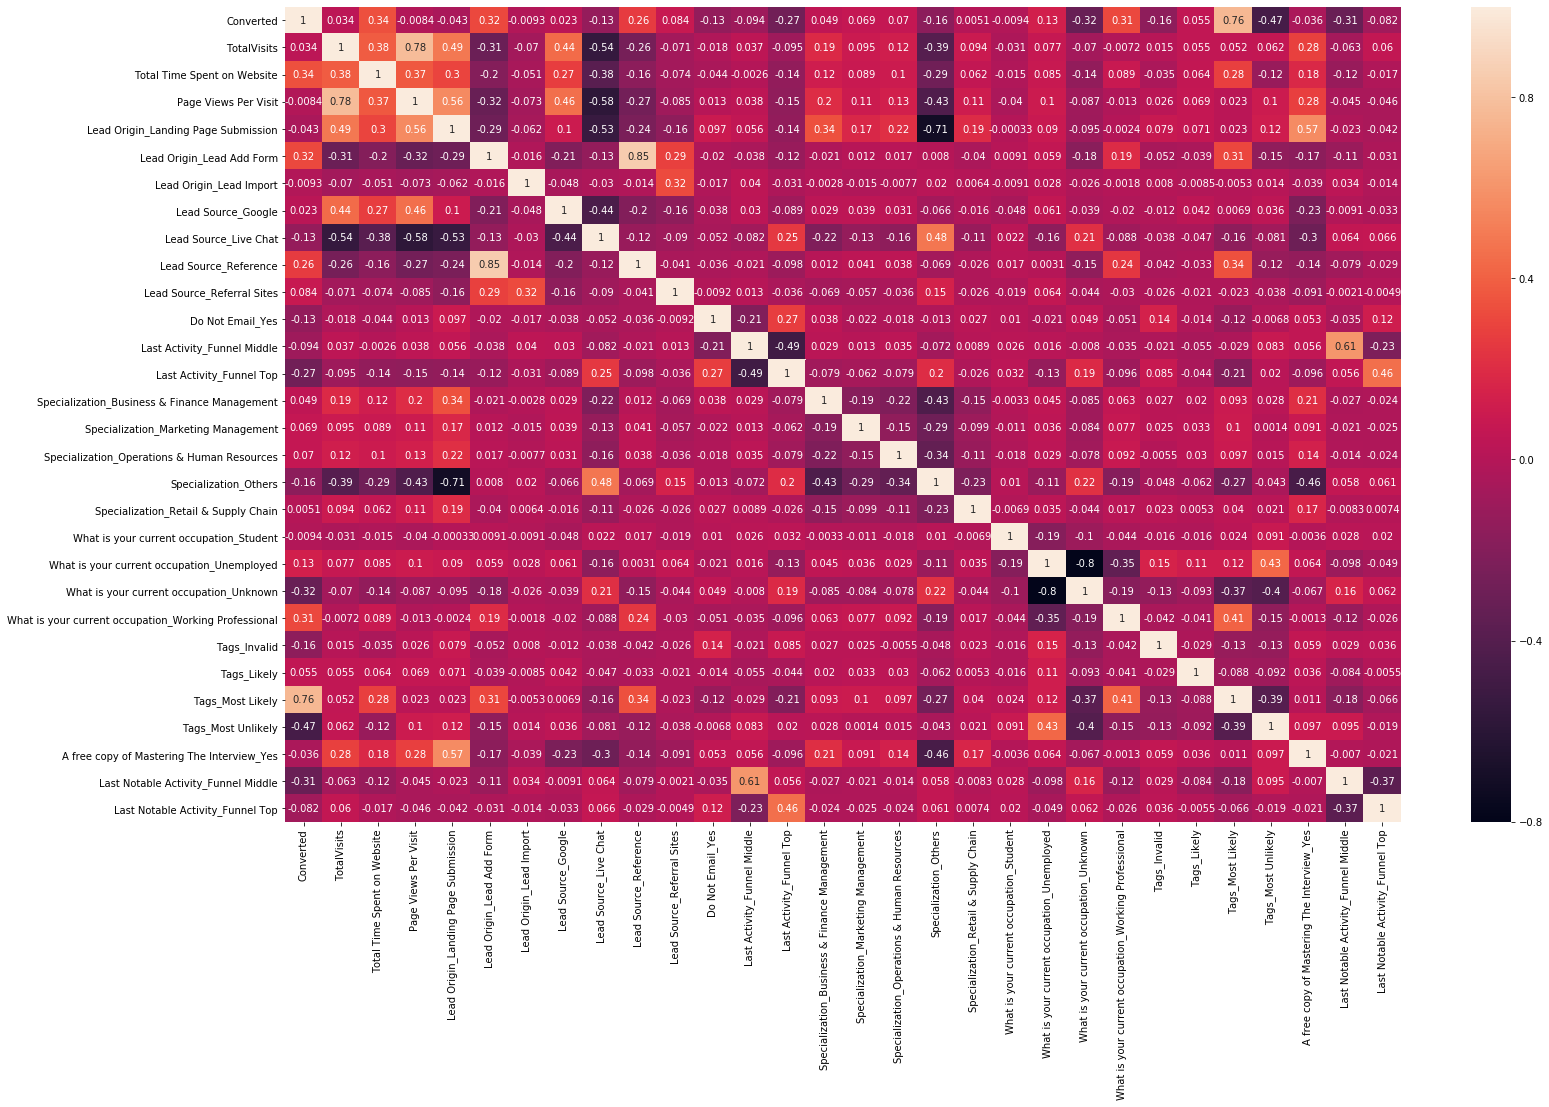

In [112]:
#Checking the data correlation
plt.figure(figsize = (25,15))        # Size of the figure
sns.heatmap(leadScoring_cleaned_df.corr(),annot = True)
plt.show()

#### Dropping some of the highly correlated dummy variables

In [113]:
X_train = X_train.drop(['TotalVisits','Lead Origin_Lead Add Form'],axis=1)

X_test = X_test.drop(['TotalVisits','Lead Origin_Lead Add Form'],axis=1)

#### Checking the correlation matrix again after droopping the highly correlated dummies

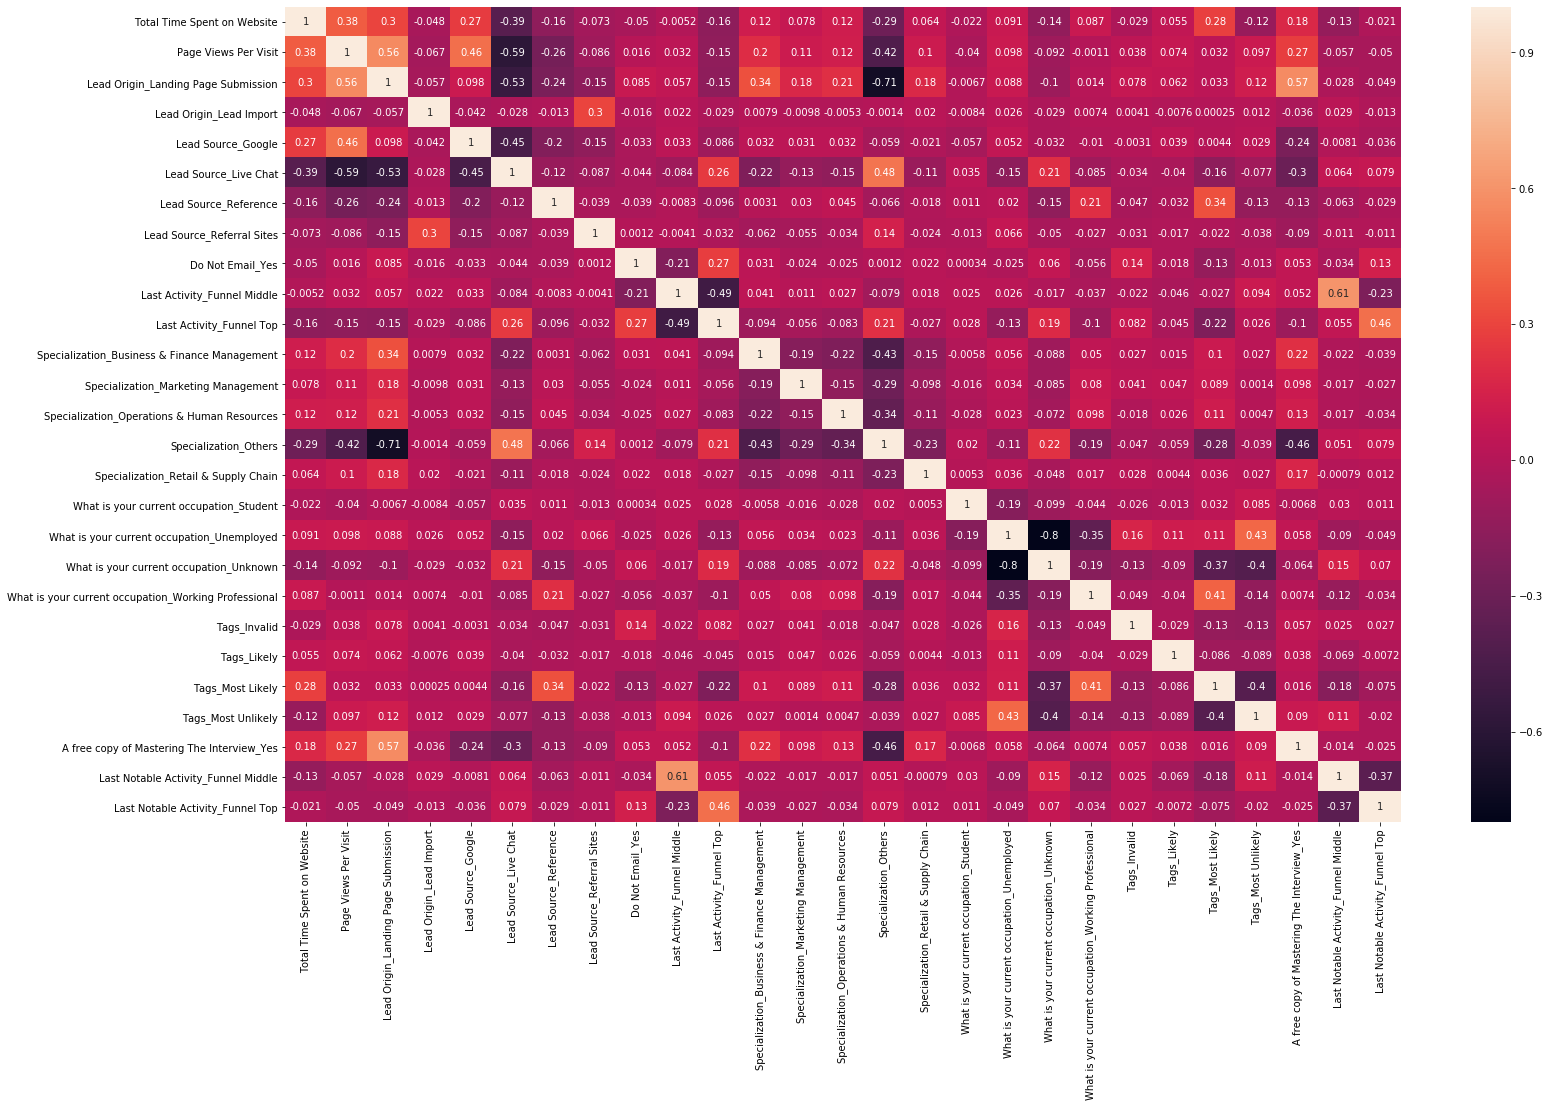

In [114]:
#Checking the data correlation
plt.figure(figsize = (25,15))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

#### So,we have removed some of the high co-related columns.

### Step 7 : Building the model

In [115]:
#importing the libraries
import statsmodels.api as sm

In [116]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### Feature Selection Using RFE :

In [117]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [118]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Live Chat',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Do Not Email_Yes', 'Last Activity_Funnel Top',
       'What is your current occupation_Unknown', 'Tags_Invalid',
       'Tags_Likely', 'Tags_Most Likely', 'Tags_Most Unlikely',
       'Last Notable Activity_Funnel Middle',
       'Last Notable Activity_Funnel Top'],
      dtype='object')

### Running our First Training Model :

In [119]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6017
Model:                            GLM   Df Residuals:                     6001
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1042.5
Date:                Mon, 26 Aug 2019   Deviance:                       2084.9
Time:                        22:30:37   Pearson chi2:                 7.00e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.6466      0.228      7.235      0.000       1.201       2.093
Total Time Spent on Website                 3.9347      0.276     14.259      0.000       3.394       4.476
Page Views Per Visit                       -1.0529      0.344     -3.061      0.002      -1.727      -0.379
Lead Origin_Lead Import                    -1.2997      0.967     -1.344      0.179      -3.195       0.595
Lead Source_Live Chat                       0.7247      0.202      3.579      0.000       0.328       1.122
Lead Source_Reference                       1.3886      0.518      2.679      0.007       0.373       2.404
Lead Source_Referral Sites                  1.5361      0.315      4.870      0.000       0.918       2.154
Do Not Email_Yes                           -0.6811      0.256     -2.662      0.008      -1.183      -0.180
Last Activity_Funnel Top                   -1.6240      0.219     -7.404      0.000      -2.054      -1.194
What is your current occupation_Unknown    -2.4416      0.145    -16.818      0.000      -2.726      -2.157
Tags_Invalid                               -5.1888      0.623     -8.334      0.000      -6.409      -3.969
Tags_Likely                                -1.2125      0.267     -4.537      0.000      -1.736      -0.689
Tags_Most Likely                            3.2616      0.207     15.721      0.000       2.855       3.668
Tags_Most Unlikely                         -4.7739      0.223    -21.428      0.000      -5.211      -4.337
Last Notable Activity_Funnel Middle        -2.1864      0.141    -15.453      0.000      -2.464      -1.909
Last Notable Activity_Funnel Top           -1.3026      0.345     -3.778      0.000      -1.978      -0.627
===========================================================================================================
"""

In [120]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7828    0.005094
1541    0.033337
6070    0.094778
1360    0.046647
7337    0.578707
1651    0.997402
7161    0.999388
581     0.993761
2918    0.041316
6715    0.000869
dtype: float64

In [121]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([5.09422102e-03, 3.33365175e-02, 9.47779660e-02, 4.66474225e-02,
       5.78706571e-01, 9.97402453e-01, 9.99388065e-01, 9.93760570e-01,
       4.13158207e-02, 8.68584721e-04])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [122]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = X_train_cat["Lead Number"].values
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.005094,585501
1,0,0.033337,642841
2,0,0.094778,599661
3,0,0.046647,644261
4,1,0.578707,589296


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [123]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.005094,585501,0
1,0,0.033337,642841,0
2,0,0.094778,599661,0
3,0,0.046647,644261,0
4,1,0.578707,589296,1


In [124]:
from sklearn import metrics

In [125]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3607  148]
 [ 219 2043]]


In [126]:
# Predicted     not_converted    converted
# Actual
# not_converted        3607      148
# converted            219       2043  

In [127]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9390061492438092


#### So we get the accuracy as 94% with almost all the data.

#### Checking VIFs

In [128]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Page Views Per Visit,3.98
13,Last Notable Activity_Funnel Middle,3.96
11,Tags_Most Likely,2.98
8,What is your current occupation_Unknown,2.92
12,Tags_Most Unlikely,2.79
0,Total Time Spent on Website,2.35
7,Last Activity_Funnel Top,2.03
3,Lead Source_Live Chat,1.95
14,Last Notable Activity_Funnel Top,1.63
4,Lead Source_Reference,1.43


#### Hence,based on a VIF cut-off of 5,there isn't a single variable with a high VIF.

#### So,instead we'll drop feature with p-value greater than 0.05,i.e.5% residual error.

In [130]:
col = col.drop('Lead Origin_Lead Import',1)

In [131]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6017
Model:                            GLM   Df Residuals:                     6002
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1043.3
Date:                Mon, 26 Aug 2019   Deviance:                       2086.7
Time:                        22:30:38   Pearson chi2:                 7.00e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.6337      0.227      7.188      0.000       1.188       2.079
Total Time Spent on Website                 3.9432      0.276     14.296      0.000       3.403       4.484
Page Views Per Visit                       -1.0291      0.343     -2.997      0.003      -1.702      -0.356
Lead Source_Live Chat                       0.7363      0.202      3.639      0.000       0.340       1.133
Lead Source_Reference                       1.4043      0.518      2.711      0.007       0.389       2.419
Lead Source_Referral Sites                  1.4363      0.305      4.713      0.000       0.839       2.034
Do Not Email_Yes                           -0.6726      0.255     -2.636      0.008      -1.173      -0.173
Last Activity_Funnel Top                   -1.6206      0.219     -7.391      0.000      -2.050      -1.191
What is your current occupation_Unknown    -2.4387      0.145    -16.809      0.000      -2.723      -2.154
Tags_Invalid                               -5.1889      0.623     -8.334      0.000      -6.409      -3.969
Tags_Likely                                -1.2122      0.267     -4.536      0.000      -1.736      -0.688
Tags_Most Likely                            3.2582      0.208     15.699      0.000       2.851       3.665
Tags_Most Unlikely                         -4.7742      0.223    -21.445      0.000      -5.211      -4.338
Last Notable Activity_Funnel Middle        -2.1886      0.141    -15.482      0.000      -2.466      -1.912
Last Notable Activity_Funnel Top           -1.3051      0.344     -3.790      0.000      -1.980      -0.630
===========================================================================================================
"""

#### We again check the VIF score for the model :

In [132]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Page Views Per Visit,3.96
12,Last Notable Activity_Funnel Middle,3.95
10,Tags_Most Likely,2.97
7,What is your current occupation_Unknown,2.92
11,Tags_Most Unlikely,2.78
0,Total Time Spent on Website,2.35
6,Last Activity_Funnel Top,2.03
2,Lead Source_Live Chat,1.94
13,Last Notable Activity_Funnel Top,1.63
3,Lead Source_Reference,1.43


#### Thus,we can see that all the VIF scores are below 5,and the p-values below 0.05.Thus,the feature selection has been optimal,according to our need.

In [133]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [134]:
y_train_pred[:10]

array([5.14909664e-03, 3.32740276e-02, 9.47170107e-02, 4.67602110e-02,
       5.78416425e-01, 9.97395112e-01, 9.99388239e-01, 9.93723485e-01,
       4.11110153e-02, 8.67659241e-04])

In [135]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [136]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.005149,585501,0
1,0,0.033274,642841,0
2,0,0.094717,599661,0
3,0,0.046760,644261,0
4,1,0.578416,589296,1
5,1,0.997395,641850,1
6,1,0.999388,590757,1
7,1,0.993723,653696,1
8,0,0.041111,629616,0
9,0,0.000868,594029,0


In [137]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9390061492438092


**So we get the accuracy on predicted set as 94% which is very close to our previous prediction.**

In [138]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3605,  150],
       [ 217, 2045]], dtype=int64)

In [139]:
# Predicted     not_converted    converted
# Actual
# not_converted        3605      150
# converted            217       2054 

### Calculating the other metrices

In [140]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [141]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9040671971706454

In [142]:
# Let us calculate specificity
TN / float(TN+FP)

0.9600532623169108

In [143]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.03994673768308921


In [144]:
# positive predictive value 
print (TP / float(TP+FP))

0.9316628701594533


In [145]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9432234432234432


### Step 9: Plotting the ROC Curve

In [146]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [147]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

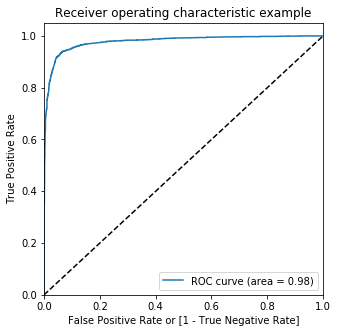

In [148]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

We know that an ROC curve demonstrates the following:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

Since our curve satisfies the above points, the model seems to have done a decent job.

### Step 10: Finding Optimal Cutoff Point

In [149]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.005149,585501,0,1,0,0,0,0,0,0,0,0,0
1,0,0.033274,642841,0,1,0,0,0,0,0,0,0,0,0
2,0,0.094717,599661,0,1,0,0,0,0,0,0,0,0,0
3,0,0.046760,644261,0,1,0,0,0,0,0,0,0,0,0
4,1,0.578416,589296,1,1,1,1,1,1,1,0,0,0,0


In [150]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375935  1.000000  0.000000
0.1   0.1  0.894632  0.968612  0.850067
0.2   0.2  0.918730  0.955349  0.896671
0.3   0.3  0.935516  0.939434  0.933156
0.4   0.4  0.939006  0.923077  0.948602
0.5   0.5  0.939006  0.904067  0.960053
0.6   0.6  0.931195  0.865164  0.970972
0.7   0.7  0.925378  0.841733  0.975766
0.8   0.8  0.917068  0.809019  0.982157
0.9   0.9  0.903274  0.763042  0.987750


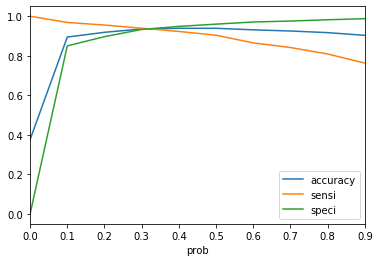

In [151]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.33 seems to be the optimum point to take it as a cutoff probability.

In [152]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.005149,585501,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.033274,642841,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.094717,599661,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.046760,644261,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.578416,589296,1,1,1,1,1,1,1,0,0,0,0,1


In [153]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9368456041216553

In [154]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3525,  230],
       [ 150, 2112]], dtype=int64)

In [155]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [156]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9336870026525199

In [157]:
# Let us calculate specificity
TN / float(TN+FP)

0.9387483355525965

In [158]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.06125166444740346


In [159]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9017933390264731


In [160]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9591836734693877


### Precision and Recall

In [161]:
#performing using SKlearn library
from sklearn.metrics import precision_score, recall_score

In [162]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9316628701594533

In [163]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9040671971706454

### Precision and recall tradeoff

In [164]:
from sklearn.metrics import precision_recall_curve

In [165]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

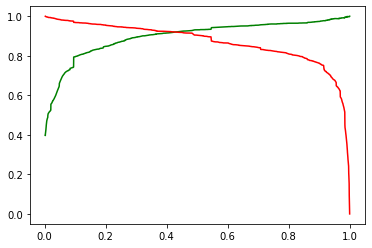

In [166]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [167]:
col

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Live Chat', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Do Not Email_Yes',
       'Last Activity_Funnel Top', 'What is your current occupation_Unknown',
       'Tags_Invalid', 'Tags_Likely', 'Tags_Most Likely', 'Tags_Most Unlikely',
       'Last Notable Activity_Funnel Middle',
       'Last Notable Activity_Funnel Top'],
      dtype='object')

In [168]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Source_Live Chat,Lead Source_Reference,Lead Source_Referral Sites,Do Not Email_Yes,Last Activity_Funnel Top,What is your current occupation_Unknown,Tags_Invalid,Tags_Likely,Tags_Most Likely,Tags_Most Unlikely,Last Notable Activity_Funnel Middle,Last Notable Activity_Funnel Top
4088,0.000000,0.000000,1,0,0,0,0,1,0,0,0,0,1,0
1080,0.084007,0.285714,0,0,0,1,0,0,0,0,0,1,1,0
1946,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,1,0
4462,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0
2577,0.109614,0.571429,0,0,0,0,0,0,0,1,0,0,1,0


In [169]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [170]:
y_test_pred = res.predict(X_test_sm)

In [171]:
y_test_pred[:10]

4088    0.094717
1080    0.002562
1946    0.983818
4462    0.998160
2577    0.127530
1608    0.936614
4972    0.049186
2688    0.020274
6379    0.094717
1793    0.914511
dtype: float64

In [172]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [173]:
# Let's see the head
y_pred_1.head()

,0
4088,0.094717
1080,0.002562
1946,0.983818
4462,0.998160
2577,0.127530


In [174]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [175]:
# Putting LeadNumber as a column  in the dataframe
y_test_df["Lead Number"] = X_test_cat["Lead Number"].values

In [176]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [177]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [178]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,617634,0.094717
1,0,647077,0.002562
2,1,639253,0.983818
3,1,614036,0.998160
4,1,632819,0.127530


In [179]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [180]:
y_pred_final['Lead Score'] = y_pred_final['Converted_Prob']*100

In [181]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(["Lead Number",'Converted','Converted_Prob','Lead Score'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,Lead Score
0,617634,1,0.094717,9.471701
1,647077,0,0.002562,0.256166
2,639253,1,0.983818,98.381843
3,614036,1,0.998160,99.816011
4,632819,1,0.127530,12.752975


In [182]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [183]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,Lead Score,final_predicted
0,617634,1,0.094717,9.471701,0
1,647077,0,0.002562,0.256166,0
2,639253,1,0.983818,98.381843,1
3,614036,1,0.998160,99.816011,1
4,632819,1,0.127530,12.752975,0


In [184]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9290697674418604

In [185]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1505,  102],
       [  81,  892]], dtype=int64)

In [186]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [187]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9167523124357657

In [188]:
# Let us calculate specificity
TN / float(TN+FP)

0.9365276913503423

In [189]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.06347230864965775


In [190]:
# positive predictive value 
print (TP / float(TP+FP))

0.89738430583501


In [191]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9489281210592686


We can see that we have got quiet good results from the other metrics as well.

#### So we have concluded our model creation with model accuracy at 90 % for both train and test sets.

Now that we have done our modelling and have successfully tested our model on the test set as well, we will look at the business requirement and try to fetch the necessary data.

As per the business requirement, the CEO has given a ballpark of the target lead conversion rate to be around 80%.

So from the final train model we would need to find the optimal probablity above which we will get 80% conversion rate.

#### The following are the different final predictions ('Converted' or 'not Converted') for various probability cut-offs. 

In [192]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.005149,585501,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.033274,642841,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.094717,599661,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.046760,644261,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.578416,589296,1,1,1,1,1,1,1,0,0,0,0,1


We will now try to find the percentage of conversion for each of the below cutoffs and we will proceed towards the cutoff value which will give us more than 80% conversion.

In [193]:
y_train_pred_cutoffSearch = y_train_pred_final.copy()
y_train_pred_cutoffSearch= y_train_pred_cutoffSearch[["Converted","Converted_Prob","Lead Number","final_predicted"]]
y_train_pred_cutoffSearch.head()

,Converted,Converted_Prob,Lead Number,final_predicted
0,0,0.005149,585501,0
1,0,0.033274,642841,0
2,0,0.094717,599661,0
3,0,0.046760,644261,0
4,1,0.578416,589296,1


In [194]:
#calculating the percentage of people who got converted considering several set of probabilities
col_train_final = [0.0,0.1,0.2,0.3 ,0.4,0.5,0.6,0.7,0.8,0.9]
#print("Percentage of Conversion: ")
count = 0
sum = 0
for i in col_train_final:
    for k in range(len(y_train_pred_cutoffSearch["Converted_Prob"])):
        if i < y_train_pred_cutoffSearch.Converted_Prob[k]:
            count = count+1
            if y_train_pred_cutoffSearch.final_predicted[k] == 1:
                sum = sum+1
    percent = (sum/count)*100
    print(i, "   ", percent)

0.0     38.9230513544956
0.1     53.40326074563904
0.2     62.06713780918728
0.3     68.39953271028037
0.4     72.91105964824435
0.5     76.1831388950033
0.6     78.61448759758869
0.7     80.53344128097872
0.8     82.0638209697472
0.9     83.29086557022623


**From the above we see that if we consider 0.7 as a cutoff, we will already have 80% of the Converted cases considered.**

**So if we consider all the leads which have more than 0.7 percent probbability, that should include Leads with more than 80% conversion rate.**

**Let's try it out in the Test set as well**

In [195]:
y_pred_cutoffSearch = y_pred_final.copy()
y_pred_cutoffSearch= y_pred_cutoffSearch[["Converted","Converted_Prob","Lead Number","final_predicted"]]
y_pred_cutoffSearch.head()

,Converted,Converted_Prob,Lead Number,final_predicted
0,1,0.094717,617634,0
1,0,0.002562,647077,0
2,1,0.983818,639253,1
3,1,0.998160,614036,1
4,1,0.127530,632819,0


In [196]:
count = 0
sum = 0
count = 0
sum = 0
for i in col_train_final:
    for k in range(len(y_pred_cutoffSearch["Converted_Prob"])):
        if i < y_pred_cutoffSearch.Converted_Prob[k]:
            count = count+1
            if y_pred_cutoffSearch.final_predicted[k] == 1:
                sum = sum+1
    percent = (sum/count)*100
    print(i, "   ", percent)

0.0     38.52713178294573
0.1     53.06994127068874
0.2     61.84155951887183
0.3     68.16389507971884
0.4     72.6710816777042
0.5     75.93624465465855
0.6     78.3591655984151
0.7     80.28453126658881
0.8     81.78697528442527
0.9     82.99917605053557


**Our assumption hold True for the test set as well.**

Hence we can conclude that we can consider all the Leads which have the probability above 0.6 should be considered in order to get more than 80% conversion rate.

In [197]:
# Joining the test and the train dataframes
lead_score_number = pd.concat([y_train_pred_cutoffSearch, y_pred_cutoffSearch])
lead_score_number.head()

,Converted,Converted_Prob,Lead Number,final_predicted
0,0,0.005149,585501,0
1,0,0.033274,642841,0
2,0,0.094717,599661,0
3,0,0.046760,644261,0
4,1,0.578416,589296,1


From the above list, let's extract the final set with 80% conversion chances.

In [198]:
lead_score_number['Lead Score'] = lead_score_number['Converted_Prob']*100

In [199]:
lead_score_number = lead_score_number.reindex_axis(["Lead Number",'Converted','final_predicted','Converted_Prob','Lead Score'], axis=1)
lead_score_number.head()

,Lead Number,Converted,final_predicted,Converted_Prob,Lead Score
0,585501,0,0,0.005149,0.514910
1,642841,0,0,0.033274,3.327403
2,599661,0,0,0.094717,9.471701
3,644261,0,0,0.046760,4.676021
4,589296,1,1,0.578416,57.841643


From the above list, let's extract the final set with 80% conversion chances.

In [200]:
lead_score_number_filtered = lead_score_number[lead_score_number["Converted_Prob"] > 0.7]
lead_score_number_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2833 entries, 5 to 2577
Data columns (total 5 columns):
Lead Number        2833 non-null category
Converted          2833 non-null int64
final_predicted    2833 non-null int64
Converted_Prob     2833 non-null float64
Lead Score         2833 non-null float64
dtypes: category(1), float64(2), int64(2)
memory usage: 508.4 KB


In [201]:
lead_score_number_filtered.head()

,Lead Number,Converted,final_predicted,Converted_Prob,Lead Score
5,641850,1,1,0.997395,99.739511
6,590757,1,1,0.999388,99.938824
7,653696,1,1,0.993723,99.372349
18,600944,1,1,0.996418,99.641793
24,579906,1,1,0.943951,94.395070


**So, we can consider the above list as the final list that containts all those leads where we can get more than 80% conversion.**

### Following are some of the possible business scenario based questions which can be answered by applying the model in realtime :

### Assignment Questions Below :

### 1.	Which are the top three variables in your model which contribute the most towards the probability of a lead getting converted?

#### Ans:

In order to get this information, we can re-run RFE but on the final X_train set of columns that we got after our modelling and also we need to mention max cols as 1.

We do this below :

In [202]:
#running RFE on X_train_sm 
rfe1 = RFE(logreg, 1)
rfe1 = rfe1.fit(X_train_sm, y_train)

In [203]:
rfe1.support_

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False])

In [204]:
list(zip(X_train.columns, rfe1.support_, rfe1.ranking_))

[('Total Time Spent on Website', False, 14),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Live Chat', False, 9),
 ('Lead Source_Reference', False, 15),
 ('Lead Source_Referral Sites', False, 6),
 ('Do Not Email_Yes', False, 5),
 ('Last Activity_Funnel Middle', False, 2),
 ('Last Activity_Funnel Top', False, 11),
 ('Specialization_Business & Finance Management', True, 1),
 ('Specialization_Marketing Management', False, 3),
 ('Specialization_Operations & Human Resources', False, 8),
 ('Specialization_Others', False, 10)]

So rankwise the below features contribute most towards the probability of a lead getting converted:
- Rank 1 : Specialization_Business & Finance Management
- Rank 2 : Last Activity_Funnel Middle
- Rank 3 : Specialization_Marketing Management
- Rank 4 : Page Views Per Visit
- Rank 5 : Do Not Email_Yes
- Rank 6 : Lead Source_Referral Sites

### 2.	The Company has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted, and hence, want to make phone calls to as many of such people as possible. Suggest a good strategy they should employ at this stage.


#### ANS:
In the model that we created we assigned a conversion probability to each and every lead and then we considered an optimal cutoff taking into consideration accuracy, sensitivity and specificity. We know that specificity and sensitivity are inversely proportional and if one increases, the other will decrease.

In our case, since we now have an extra pair of hands, we won’t mind considering the leads who have a conversion probability below the calculated optimal probability.

From the graph that we plotted between accuracy, sensitivity and specificity, we can see that at **0.01** the line of accuracy almost becomes straight so we can consider this cutoff for our case.

Let's check the same below:

In [205]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.1 else 0)
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8946318763503407

In [206]:
confusion4 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion4

array([[3192,  563],
       [  71, 2191]], dtype=int64)

In [207]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [208]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9686118479221928

In [209]:
# Let us calculate specificity
TN / float(TN+FP)

0.8500665778961385

### 3.	Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So, during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

#### ANS:
In this case as well we follow the same strategy but this time rather than sacrificing specificity, we will sacrifice sensitivity. So, we can afford to have false negatives but we can not afford to have false positives.

But again selection should be made by making sure that we do not sacrifice on accuracy or else the predictions will fail.

From the graph that we plotted between accuracy, sensitivity and specificity, we can see that beyond 0.75 the line of accuracy starts dropping so we can consider this cutoff for our case.

Let's check the same below:

In [210]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.75 else 0)
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9212232009306963

In [211]:
confusion5 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion5

array([[3679,   76],
       [ 398, 1864]], dtype=int64)

In [212]:
TP = confusion5[1,1] # true positive 
TN = confusion5[0,0] # true negatives
FP = confusion5[0,1] # false positives
FN = confusion5[1,0] # false negatives

In [213]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8240495137046862

In [214]:
# Let us calculate specificity
TN / float(TN+FP)

0.9797603195739014

### THANK YOU